## Exploratory Data Analysis

**This notebook works through a preliminary data analysis of the CPS dataset available at https://www.kaggle.com/econdata/demographics-and-employment-in-the-united-states**

In [89]:
from pandas import read_csv
from pandas import crosstab
from IPython.display import Markdown, display

cps = read_csv("../data/CPSData.csv")

In [2]:
# Df metadata
cps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131302 entries, 0 to 131301
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PeopleInHousehold   131302 non-null  int64  
 1   Region              131302 non-null  object 
 2   State               131302 non-null  object 
 3   MetroAreaCode       97064 non-null   float64
 4   Age                 131302 non-null  int64  
 5   Married             105964 non-null  object 
 6   Sex                 131302 non-null  object 
 7   Education           105964 non-null  object 
 8   Race                131302 non-null  object 
 9   Hispanic            131302 non-null  int64  
 10  CountryOfBirthCode  131302 non-null  int64  
 11  Citizenship         131302 non-null  object 
 12  EmploymentStatus    105513 non-null  object 
 13  Industry            66242 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 14.0+ MB


In [3]:
# Number of unique values for each column 
cps.nunique()

PeopleInHousehold      15
Region                  4
State                  51
MetroAreaCode         264
Age                    82
Married                 5
Sex                     2
Education               8
Race                    6
Hispanic                2
CountryOfBirthCode    161
Citizenship             3
EmploymentStatus        5
Industry               14
dtype: int64

In [74]:
display(Markdown("## Basic statistics"))
display(Markdown("#### Proportions of male and female"))
print(f'{cps.Sex.value_counts(normalize=True)*100}')
display(Markdown("#### Distribution across races"))
print(f'{cps.Race.value_counts(normalize=True)*100}')

## Basic statistics

#### Proportions of male and female

Female    51.393734
Male      48.606266
Name: Sex, dtype: float64


#### Distribution across races

White               80.669754
Black               10.596183
Asian                4.965652
Multiracial          2.206364
American Indian      1.091377
Pacific Islander     0.470671
Name: Race, dtype: float64


## Group age by decade

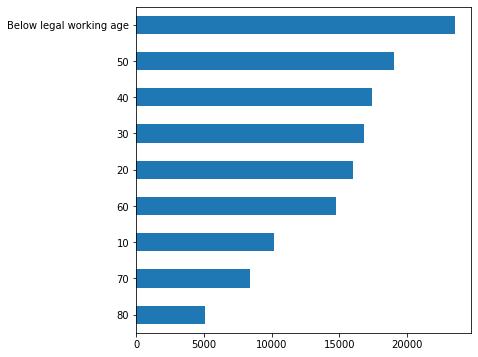

In [67]:
# Group records by decade. Everyone below the legal working age of 14 is assigned to their own group.
cps['age_by_decade'] = cps['Age'].apply(lambda x: 'Below legal working age' if x < 14 else x//10*10)

cps.age_by_decade.value_counts().sort_values().plot(kind="barh", figsize=(6,6))

## Employment status distribution

#### Before grouping disabled and retired

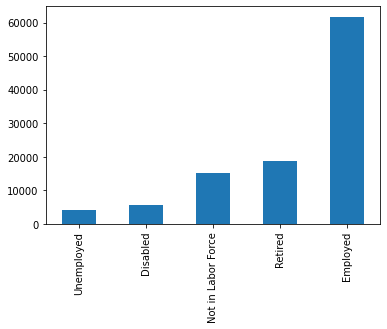

In [75]:
display(Markdown("#### Before grouping disabled and retired"))
# Employment status distribution 
cps.EmploymentStatus.value_counts().sort_values().plot(kind="bar")

#### Employment status distribution after grouping retired and disabled

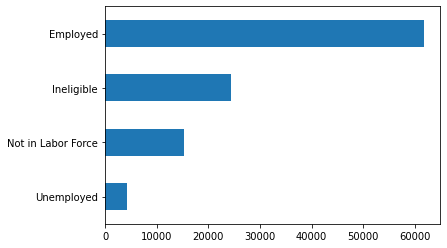

In [78]:
display(Markdown('#### Employment status distribution after grouping retired and disabled'))
# Employment status distribution 
cps['employment_status_grouped'] = cps['EmploymentStatus'].\
apply(lambda x: 'Ineligible' if x == "Retired" or x == "Disabled" else x)


cps.employment_status_grouped.value_counts().sort_values().plot(kind="barh")

#### EmploymentStatus distribution across race

employment_status_grouped  Employed  Ineligible  Not in Labor Force  \
Race                                                                  
American Indian                 535         213                 231   
Asian                          3206         805                1091   
Black                          5552        2603                1834   
Multiracial                     920         264                 393   
Pacific Islander                270          66                 100   
White                         51250       20380               11597   

employment_status_grouped  Unemployed  
Race                                   
American Indian                    83  
Asian                             165  
Black                             806  
Multiracial                        97  
Pacific Islander                   26  
White                            3026  


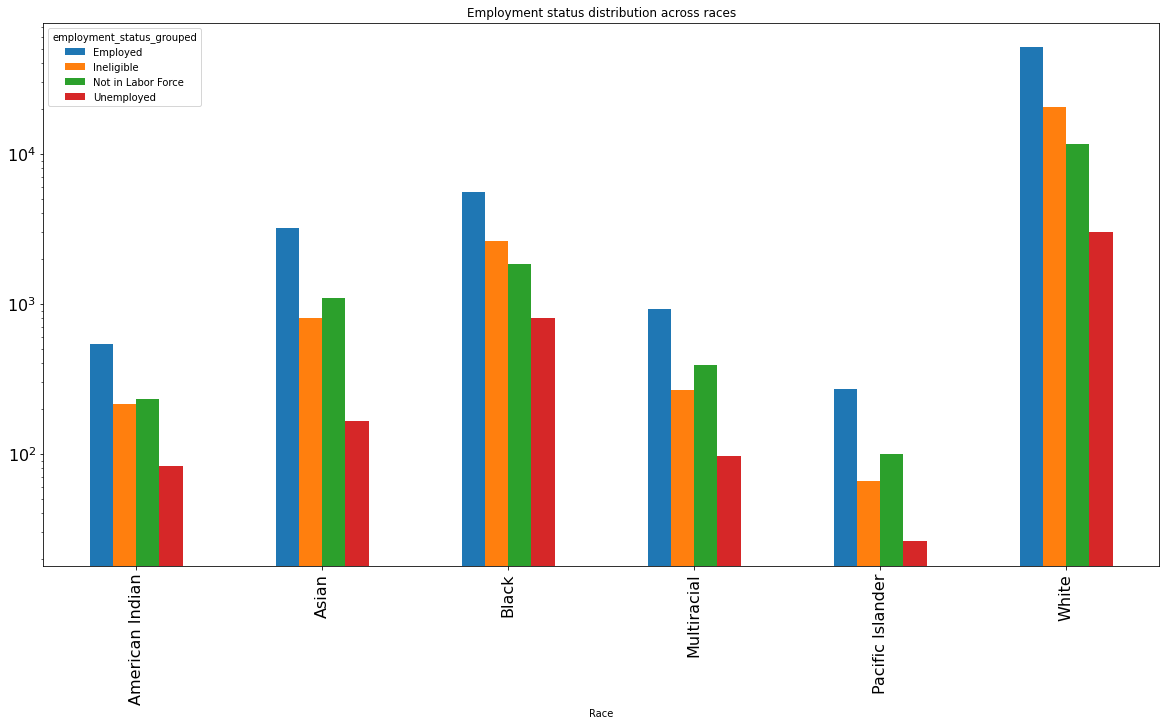

In [83]:
display(Markdown("#### EmploymentStatus distribution across race"))
print(crosstab(cps['Race'], columns=cps['employment_status_grouped']))
crosstab(cps['Race'], columns=cps['employment_status_grouped']).plot(kind="bar", logy=True, figsize=(20,10),\
                                                           title="Employment status distribution across races",\
                                                           fontsize=16)

In [88]:
display(Markdown("## Proportion of white and non-white"))
# White vs non-white
cps["race_binary"] = cps["Race"].apply(lambda x: 1.0 if x =='White' else 0.0)

cps['race_binary'].value_counts()

## Proportion of white and non-white

1.0    105921
0.0     25381
Name: race_binary, dtype: int64

In [86]:
# EmploymentStatus distribution across genders
crosstab(cps['Sex'], columns=cps['EmploymentStatus'])

EmploymentStatus,Disabled,Employed,Not in Labor Force,Retired,Unemployed
Sex,,,,,
Female,3007,29614,9910,10715,1966
Male,2705,32119,5336,7904,2237
